In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tensorflow.keras import layers,models,optimizers
import math
import time

In [33]:
Epochs=500

In [34]:
#data loading
dataset_paths = []
for i in range(15):
    dataset_paths.append("./dataset/data"+str(i+1)+".csv")

all_datasets = []

for dataset_path in dataset_paths:
    current_dataset = pd.read_csv(dataset_path)
    all_datasets.append(current_dataset)

df = pd.concat(all_datasets, ignore_index=True)

In [35]:
df = df.sample(frac=1).reset_index(drop=True)

In [36]:
df.head()

,R1-PA1:VH,R1-PM1:V,R1-PA2:VH,R1-PM2:V,R1-PA3:VH,R1-PM3:V,R1-PA4:IH,R1-PM4:I,R1-PA5:IH,R1-PM5:I,...,control_panel_log4,relay1_log,relay2_log,relay3_log,relay4_log,snort_log1,snort_log2,snort_log3,snort_log4,marker
0,-117.387593,130932.6159,122.618698,130305.7842,2.641335,131007.8358,-122.269194,496.41121,118.063683,495.49566,...,0,0,0,0,0,0,0,0,0,Natural
1,-147.507984,131785.1071,92.521225,131133.2021,-27.484785,131810.1804,-149.731061,377.20660,90.899754,375.55861,...,0,0,0,0,0,0,0,0,0,Attack
2,-140.363201,132186.2794,99.643090,131559.4477,-20.340002,132286.5725,-140.059533,299.75107,99.431096,301.39906,...,0,0,0,0,0,0,0,0,0,Attack
3,-51.898517,131734.9606,-171.875879,131108.1288,68.130411,131785.1071,-54.385154,385.62966,-174.345327,385.81277,...,0,0,0,0,0,0,0,0,0,Attack
4,-121.793639,132035.8398,118.218382,131383.9348,-1.776169,132085.9864,-122.847881,335.82374,117.020900,336.37307,...,0,0,0,0,0,0,0,0,0,Natural


In [37]:
df.describe()

,R1-PA1:VH,R1-PM1:V,R1-PA2:VH,R1-PM2:V,R1-PA3:VH,R1-PM3:V,R1-PA4:IH,R1-PM4:I,R1-PA5:IH,R1-PM5:I,...,control_panel_log3,control_panel_log4,relay1_log,relay2_log,relay3_log,relay4_log,snort_log1,snort_log2,snort_log3,snort_log4
count,78377.000000,78377.000000,78377.000000,78377.000000,78377.000000,78377.000000,78377.000000,78377.000000,78377.000000,78377.000000,...,78377.000000,78377.000000,78377.000000,78377.000000,78377.000000,78377.000000,78377.000000,78377.000000,78377.000000,78377.000000
mean,-15.802424,130764.039577,2.175196,131035.528095,6.834315,131395.717581,-14.334996,393.949321,3.538540,387.438133,...,0.000026,0.000026,0.035916,0.026436,0.026500,0.035597,0.000051,0.000051,0.000089,0.000077
std,100.876750,8546.118477,111.743169,5393.135370,97.065063,5443.752388,99.601107,190.966011,109.504977,151.277183,...,0.005051,0.005051,0.186082,0.160430,0.160618,0.185285,0.007144,0.007144,0.009450,0.008749
min,-179.988962,0.000000,-179.994691,0.000000,-179.994691,0.000000,-179.994691,0.000000,-179.994691,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-100.416583,131057.982300,-102.129727,130732.029800,-69.459673,131133.202100,-98.159129,305.793700,-94.790138,311.836330,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-28.865614,131684.814000,8.118812,131358.861500,13.401483,131760.033900,-23.514188,378.671480,1.885031,383.249230,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,68.096034,132186.279400,104.897113,131885.400200,85.324875,132261.499300,66.274028,456.676340,102.674037,460.338540,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,179.994691,151592.990400,179.994691,151567.917200,179.988962,151693.283500,179.994691,1779.462980,179.994691,1265.656320,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [38]:
df["marker"].unique()

array(['Natural', 'Attack'], dtype=object)

In [39]:
df["marker"]=df["marker"].replace({"Natural":0,"Attack":1})

In [40]:
df["marker"].unique()

array([0, 1], dtype=int64)

In [41]:
df=df.replace([np.inf,-np.inf],np.nan)

In [42]:
p = df.isna().sum()

In [43]:
df=df.dropna()

In [44]:
df.describe()

,R1-PA1:VH,R1-PM1:V,R1-PA2:VH,R1-PM2:V,R1-PA3:VH,R1-PM3:V,R1-PA4:IH,R1-PM4:I,R1-PA5:IH,R1-PM5:I,...,control_panel_log4,relay1_log,relay2_log,relay3_log,relay4_log,snort_log1,snort_log2,snort_log3,snort_log4,marker
count,72073.000000,72073.000000,72073.000000,72073.000000,72073.000000,72073.000000,72073.000000,72073.000000,72073.000000,72073.000000,...,72073.000000,72073.000000,72073.000000,72073.000000,72073.000000,72073.000000,72073.000000,72073.000000,72073.000000,72073.000000
mean,-15.627669,131120.592936,2.171844,131317.545414,6.571804,131683.845875,-14.935475,391.077015,3.416307,386.595319,...,0.000014,0.001054,0.000985,0.000916,0.001235,0.000055,0.000055,0.000097,0.000083,0.713790
std,100.952714,6652.367750,111.795333,2069.528362,97.175908,2161.638231,101.216523,140.081111,111.712919,86.123313,...,0.003725,0.032456,0.031371,0.030248,0.035119,0.007450,0.007450,0.009855,0.009124,0.451992
min,-179.988962,11834.583440,-179.994691,11383.264580,-179.994691,11433.411120,-179.994691,0.000000,-179.994691,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-100.324910,131108.128800,-101.843248,130782.176300,-70.112845,131183.348600,-100.559823,313.484320,-99.499851,319.160730,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-28.951557,131684.814000,8.181837,131358.861500,13.292621,131760.033900,-28.607783,379.403920,10.960683,384.347890,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,68.611696,132136.132900,105.028893,131810.180400,85.089962,132211.352700,69.201842,451.915480,105.647688,455.394570,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,179.994691,146452.970100,179.994691,145750.918500,179.988962,146528.189900,179.988962,1779.462980,179.994691,1187.651460,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [45]:
np.sum(df["marker"]==0) , np.sum(df["marker"]==1)

(20628, 51445)

In [46]:
#segregating independent and dependent varibales using index location menthod
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [47]:

# Separate majority and minority classes
majority_class = df[df['marker'] == 1]
minority_class = df[df['marker'] == 0]

# Determine the ratio of samples between majority and minority classes
ratio = len(majority_class) / len(minority_class)

# Upsample the minority class
upsampled_minority = minority_class.sample(n=int(ratio * len(minority_class)), replace=True, random_state=42)

# Concatenate majority class with upsampled minority class
upsampled_df = pd.concat([majority_class, upsampled_minority], ignore_index=True)

# Shuffle the upsampled dataframe
df = upsampled_df.sample(frac=1, random_state=42).reset_index(drop=True)


In [48]:
np.sum(df["marker"]==0) , np.sum(df["marker"]==1)

(51445, 51445)

In [49]:
# def getColumns(df,s):
#     columns = df.columns
#     ans = []
#     for v in columns:
#         if s in v:
#             ans.append(v)
#     return ans

# PAColumns = getColumns(df,"PA")
# for col in PAColumns:
#     currentColValues = df[col]
    
#     sinValues = [math.sin(math.radians(x)) for x in currentColValues]
#     cosValues = [math.cos(math.radians(x)) for x in currentColValues]
#     df[col+":Sin"]  = sinValues
#     df[col+":Cos"]  = cosValues
# df.drop(inplace=True,columns=PAColumns)
# df.head()

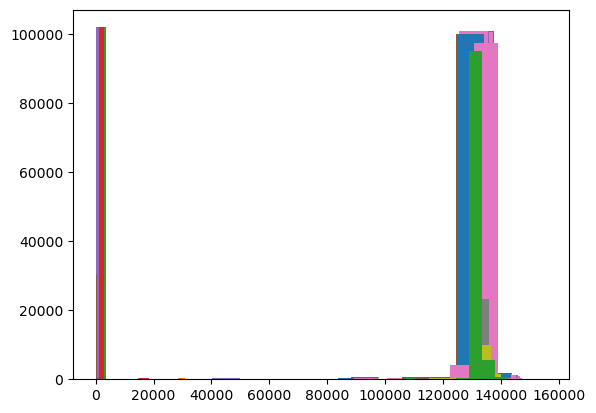

In [50]:
def getMagColumns(df,s):
    columns = df.columns
    ans = []
    for v in columns:
        if s in v:
            ans.append(v)
    return ans

PMColumns = getMagColumns(df,"PM")
for v in PMColumns:
    plt.hist(df[v],bins=15)
plt.show()

In [51]:
# #Quantile method
# #find lower and upper limit 
lowerlimit=[]
for v in PMColumns:
    lowerlimit.append(df[v].quantile(0.05))

In [52]:
upperlimit=[]
for v in PMColumns:
    upperlimit.append(df[v].quantile(0.95))

In [53]:
start_time=time.time()
df1 = pd.DataFrame()
want=[]

for idx in range(len(df)):
    row=df.iloc[idx]
    flag=1
    for j,v in enumerate(PMColumns):
        if(row[v]>=lowerlimit[j] and row[v]<=upperlimit[j]):
            continue
        else:
            flag=0
    if(flag==1):
        want.append(idx)
df1 = df.iloc[want]
end_time=time.time()
print((end_time-start_time)," sec")
df1.head()


33.91892647743225  sec


,R1-PA1:VH,R1-PM1:V,R1-PA2:VH,R1-PM2:V,R1-PA3:VH,R1-PM3:V,R1-PA4:IH,R1-PM4:I,R1-PA5:IH,R1-PM5:I,...,control_panel_log4,relay1_log,relay2_log,relay3_log,relay4_log,snort_log1,snort_log2,snort_log3,snort_log4,marker
1,-97.225208,131057.9823,142.781082,130431.1505,22.786532,131133.2021,-100.393665,470.04337,138.409415,476.08600,...,0,0,0,0,0,0,0,0,0,1
2,-26.321681,130732.0298,-146.304773,130732.0298,93.701518,130832.3229,-27.851478,454.66213,-150.384232,467.84605,...,0,0,0,0,0,0,0,0,0,1
3,4.371668,130857.3961,-115.588506,130857.3961,124.394867,130932.6159,-0.618794,494.58011,-120.538861,496.59432,...,0,0,0,0,0,0,0,0,0,0
4,27.633754,132311.6458,-92.349337,131684.8140,147.651224,132361.7923,28.940098,274.48189,-91.501360,275.76366,...,0,0,0,0,0,0,0,0,0,1
5,-115.210353,132035.8398,124.813126,131985.6933,4.801386,132085.9864,-115.869255,319.16073,124.068281,318.06207,...,0,0,0,0,0,0,0,0,0,0


In [54]:
 x_train, x_test, y_train, y_test = train_test_split(  x, y, test_size=0.30, random_state=42)

In [55]:
scaler=MinMaxScaler()
x_train=scaler.fit_transform(x_train)

In [56]:
x_test=scaler.transform(x_test)

In [57]:
model=models.Sequential([
    layers.Input(shape=(x_train.shape[1],)),
    layers.Dense(1024,activation='relu'),
    layers.Dense(1024,activation='relu'),
    layers.Dense(1024,activation='relu'),
    layers.Dense(512,activation='relu'),
    layers.Dense(1,activation='sigmoid')
])

In [58]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [59]:
history=model.fit(x_train,y_train,epochs=Epochs,validation_split=0.2,batch_size=256)

Epoch 1/500


158/158 [==============================] - 11s 61ms/step - loss: 0.5986 - accuracy: 0.7139 - val_loss: 0.5958 - val_accuracy: 0.7112
Epoch 2/500
158/158 [==============================] - 10s 62ms/step - loss: 0.5945 - accuracy: 0.7140 - val_loss: 0.5953 - val_accuracy: 0.7112
Epoch 3/500
158/158 [==============================] - 10s 63ms/step - loss: 0.5933 - accuracy: 0.7140 - val_loss: 0.5954 - val_accuracy: 0.7112
Epoch 4/500
158/158 [==============================] - 12s 76ms/step - loss: 0.5911 - accuracy: 0.7140 - val_loss: 0.5919 - val_accuracy: 0.7112
Epoch 5/500
158/158 [==============================] - 10s 66ms/step - loss: 0.5900 - accuracy: 0.7138 - val_loss: 0.5906 - val_accuracy: 0.7125
Epoch 6/500
158/158 [==============================] - 9s 59ms/step - loss: 0.5901 - accuracy: 0.7142 - val_loss: 0.5902 - val_accuracy: 0.7121
Epoch 7/500
158/158 [==============================] - 9s 57ms/step - loss: 0.5894 - accuracy: 0.7139 - val_loss: 0.5913 - val_ac

158/158 [==============================] - 11s 69ms/step - loss: 0.5750 - accuracy: 0.7194 - val_loss: 0.5868 - val_accuracy: 0.7158
Epoch 55/500
158/158 [==============================] - 11s 68ms/step - loss: 0.5767 - accuracy: 0.7187 - val_loss: 0.5867 - val_accuracy: 0.7169
Epoch 56/500
158/158 [==============================] - 11s 73ms/step - loss: 0.5740 - accuracy: 0.7204 - val_loss: 0.5874 - val_accuracy: 0.7140
Epoch 57/500
158/158 [==============================] - 12s 76ms/step - loss: 0.5734 - accuracy: 0.7219 - val_loss: 0.5885 - val_accuracy: 0.7144
Epoch 58/500
158/158 [==============================] - 11s 71ms/step - loss: 0.5728 - accuracy: 0.7214 - val_loss: 0.5931 - val_accuracy: 0.7119
Epoch 59/500
158/158 [==============================] - 10s 66ms/step - loss: 0.5733 - accuracy: 0.7218 - val_loss: 0.5910 - val_accuracy: 0.7138
Epoch 60/500
158/158 [==============================] - 11s 69ms/step - loss: 0.5707 - accuracy: 0.7215 - val_loss: 0.5897 - val_accuracy

158/158 [==============================] - 12s 79ms/step - loss: 0.5070 - accuracy: 0.7525 - val_loss: 0.6283 - val_accuracy: 0.7227
Epoch 111/500
158/158 [==============================] - 10s 65ms/step - loss: 0.5030 - accuracy: 0.7572 - val_loss: 0.6124 - val_accuracy: 0.7289
Epoch 112/500
158/158 [==============================] - 10s 62ms/step - loss: 0.5035 - accuracy: 0.7562 - val_loss: 0.6045 - val_accuracy: 0.7319
Epoch 113/500
158/158 [==============================] - 11s 67ms/step - loss: 0.5020 - accuracy: 0.7558 - val_loss: 0.6229 - val_accuracy: 0.7248
Epoch 114/500
158/158 [==============================] - 11s 69ms/step - loss: 0.4941 - accuracy: 0.7606 - val_loss: 0.6041 - val_accuracy: 0.7292
Epoch 115/500
158/158 [==============================] - 9s 60ms/step - loss: 0.4940 - accuracy: 0.7610 - val_loss: 0.6159 - val_accuracy: 0.7280
Epoch 116/500
158/158 [==============================] - 9s 60ms/step - loss: 0.4998 - accuracy: 0.7591 - val_loss: 0.6123 - val_accu

Epoch 166/500
158/158 [==============================] - 11s 68ms/step - loss: 0.4228 - accuracy: 0.7961 - val_loss: 0.6884 - val_accuracy: 0.7477
Epoch 167/500
158/158 [==============================] - 11s 69ms/step - loss: 0.4156 - accuracy: 0.7996 - val_loss: 0.6840 - val_accuracy: 0.7475
Epoch 168/500
158/158 [==============================] - 12s 75ms/step - loss: 0.4108 - accuracy: 0.8018 - val_loss: 0.6790 - val_accuracy: 0.7445
Epoch 169/500
158/158 [==============================] - 11s 70ms/step - loss: 0.4187 - accuracy: 0.7972 - val_loss: 0.7200 - val_accuracy: 0.7375
Epoch 170/500
158/158 [==============================] - 11s 69ms/step - loss: 0.4160 - accuracy: 0.8007 - val_loss: 0.6968 - val_accuracy: 0.7491
Epoch 171/500
158/158 [==============================] - 11s 69ms/step - loss: 0.4197 - accuracy: 0.7990 - val_loss: 0.7020 - val_accuracy: 0.7434
Epoch 172/500
158/158 [==============================] - 10s 63ms/step - loss: 0.4148 - accuracy: 0.8008 - val_loss: 0

Epoch 222/500
158/158 [==============================] - 10s 60ms/step - loss: 0.3636 - accuracy: 0.8256 - val_loss: 0.7226 - val_accuracy: 0.7660
Epoch 223/500
158/158 [==============================] - 9s 60ms/step - loss: 0.3592 - accuracy: 0.8286 - val_loss: 0.7467 - val_accuracy: 0.7624
Epoch 224/500
158/158 [==============================] - 9s 59ms/step - loss: 0.3546 - accuracy: 0.8302 - val_loss: 0.7398 - val_accuracy: 0.7654
Epoch 225/500
158/158 [==============================] - 9s 60ms/step - loss: 0.3595 - accuracy: 0.8297 - val_loss: 0.7277 - val_accuracy: 0.7696
Epoch 226/500
158/158 [==============================] - 10s 62ms/step - loss: 0.3613 - accuracy: 0.8287 - val_loss: 0.7627 - val_accuracy: 0.7553
Epoch 227/500
158/158 [==============================] - 9s 59ms/step - loss: 0.3631 - accuracy: 0.8282 - val_loss: 0.7904 - val_accuracy: 0.7536
Epoch 228/500
158/158 [==============================] - 9s 58ms/step - loss: 0.3590 - accuracy: 0.8286 - val_loss: 0.7508

Epoch 278/500
158/158 [==============================] - 10s 62ms/step - loss: 0.3274 - accuracy: 0.8456 - val_loss: 0.8399 - val_accuracy: 0.7676
Epoch 279/500
158/158 [==============================] - 9s 60ms/step - loss: 0.3262 - accuracy: 0.8447 - val_loss: 0.8228 - val_accuracy: 0.7748
Epoch 280/500
158/158 [==============================] - 11s 68ms/step - loss: 0.3219 - accuracy: 0.8511 - val_loss: 0.8189 - val_accuracy: 0.7820
Epoch 281/500
158/158 [==============================] - 9s 60ms/step - loss: 0.3128 - accuracy: 0.8526 - val_loss: 0.8254 - val_accuracy: 0.7846
Epoch 282/500
158/158 [==============================] - 9s 59ms/step - loss: 0.3121 - accuracy: 0.8534 - val_loss: 0.8228 - val_accuracy: 0.7870
Epoch 283/500
158/158 [==============================] - 10s 62ms/step - loss: 0.3264 - accuracy: 0.8460 - val_loss: 0.8565 - val_accuracy: 0.7700
Epoch 284/500
158/158 [==============================] - 10s 63ms/step - loss: 0.3217 - accuracy: 0.8500 - val_loss: 0.87

Epoch 334/500
158/158 [==============================] - 10s 63ms/step - loss: 0.2880 - accuracy: 0.8668 - val_loss: 0.9112 - val_accuracy: 0.7811
Epoch 335/500
158/158 [==============================] - 10s 61ms/step - loss: 0.2892 - accuracy: 0.8665 - val_loss: 0.8825 - val_accuracy: 0.7955
Epoch 336/500
158/158 [==============================] - 10s 62ms/step - loss: 0.2793 - accuracy: 0.8694 - val_loss: 0.9496 - val_accuracy: 0.7698
Epoch 337/500
158/158 [==============================] - 10s 61ms/step - loss: 0.2889 - accuracy: 0.8653 - val_loss: 0.9076 - val_accuracy: 0.7857
Epoch 338/500
158/158 [==============================] - 10s 60ms/step - loss: 0.2861 - accuracy: 0.8671 - val_loss: 0.8922 - val_accuracy: 0.7830
Epoch 339/500
158/158 [==============================] - 10s 62ms/step - loss: 0.2835 - accuracy: 0.8701 - val_loss: 0.8714 - val_accuracy: 0.7925
Epoch 340/500
158/158 [==============================] - 10s 61ms/step - loss: 0.2911 - accuracy: 0.8658 - val_loss: 0

Epoch 390/500
158/158 [==============================] - 9s 57ms/step - loss: 0.2586 - accuracy: 0.8821 - val_loss: 0.9790 - val_accuracy: 0.7969
Epoch 391/500
158/158 [==============================] - 10s 61ms/step - loss: 0.2557 - accuracy: 0.8817 - val_loss: 0.9425 - val_accuracy: 0.7993
Epoch 392/500
158/158 [==============================] - 9s 59ms/step - loss: 0.2607 - accuracy: 0.8811 - val_loss: 0.9682 - val_accuracy: 0.7912
Epoch 393/500
158/158 [==============================] - 11s 72ms/step - loss: 0.2629 - accuracy: 0.8790 - val_loss: 0.9321 - val_accuracy: 0.8011
Epoch 394/500
158/158 [==============================] - 10s 60ms/step - loss: 0.2547 - accuracy: 0.8853 - val_loss: 0.9805 - val_accuracy: 0.7997
Epoch 395/500
158/158 [==============================] - 10s 64ms/step - loss: 0.2748 - accuracy: 0.8719 - val_loss: 0.9445 - val_accuracy: 0.7952
Epoch 396/500
158/158 [==============================] - 11s 68ms/step - loss: 0.3086 - accuracy: 0.8596 - val_loss: 0.9

Epoch 446/500
158/158 [==============================] - 10s 65ms/step - loss: 0.2504 - accuracy: 0.8859 - val_loss: 0.9645 - val_accuracy: 0.8068
Epoch 447/500
158/158 [==============================] - 11s 73ms/step - loss: 0.2456 - accuracy: 0.8895 - val_loss: 1.0241 - val_accuracy: 0.7926
Epoch 448/500
158/158 [==============================] - 11s 72ms/step - loss: 0.2421 - accuracy: 0.8880 - val_loss: 0.9859 - val_accuracy: 0.7967
Epoch 449/500
158/158 [==============================] - 10s 63ms/step - loss: 0.2573 - accuracy: 0.8835 - val_loss: 0.9754 - val_accuracy: 0.8078
Epoch 450/500
158/158 [==============================] - 10s 65ms/step - loss: 0.2301 - accuracy: 0.8962 - val_loss: 0.9660 - val_accuracy: 0.8182
Epoch 451/500
158/158 [==============================] - 10s 63ms/step - loss: 0.2319 - accuracy: 0.8950 - val_loss: 1.0132 - val_accuracy: 0.8012
Epoch 452/500
158/158 [==============================] - 10s 65ms/step - loss: 0.2431 - accuracy: 0.8891 - val_loss: 0

In [60]:
loss=history.history["loss"]
accuracy=history.history["accuracy"]
val_loss  = history.history["val_loss"]
val_accuracy=history.history["val_accuracy"]

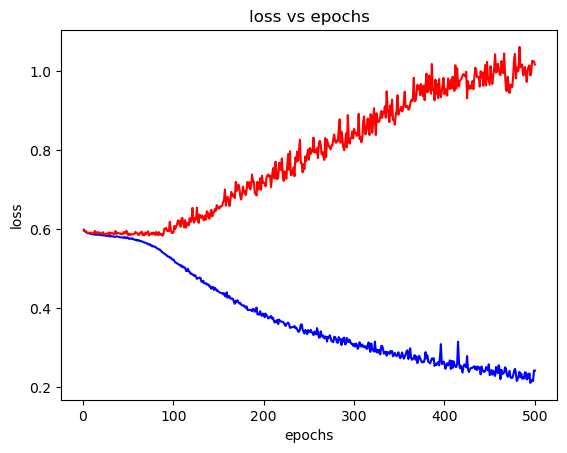

In [61]:
plt.plot([(x+1) for x in range(Epochs)],loss,color="blue")
plt.plot([(x+1) for x in range(Epochs)],val_loss,color="red")
plt.title("loss vs epochs")
plt.ylabel("loss")
plt.xlabel("epochs")
plt.show()

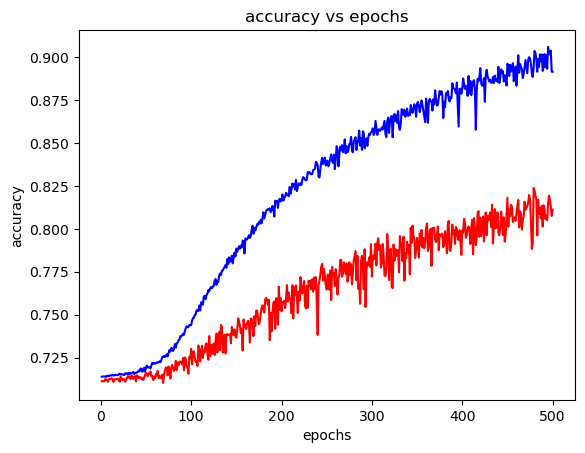

In [62]:
plt.plot([(x+1) for x in range(Epochs)],accuracy,color="blue")
plt.plot([(x+1) for x in range(Epochs)],val_accuracy,color="red")
plt.title("accuracy vs epochs")
plt.ylabel("accuracy")
plt.xlabel("epochs")
plt.show()

In [63]:
y_predict=model.predict(x_test)

676/676 [==============================] - 3s 4ms/step


In [72]:
y_pred=[]
for val in y_predict:
    if(val[0]>0.5):
        y_pred.append(1)
    else:
        y_pred.append(0)

In [73]:
accuracy=accuracy_score(y_test,y_pred)
print(accuracy)

0.8140782536305614


In [74]:
print(y_pred)

[1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 

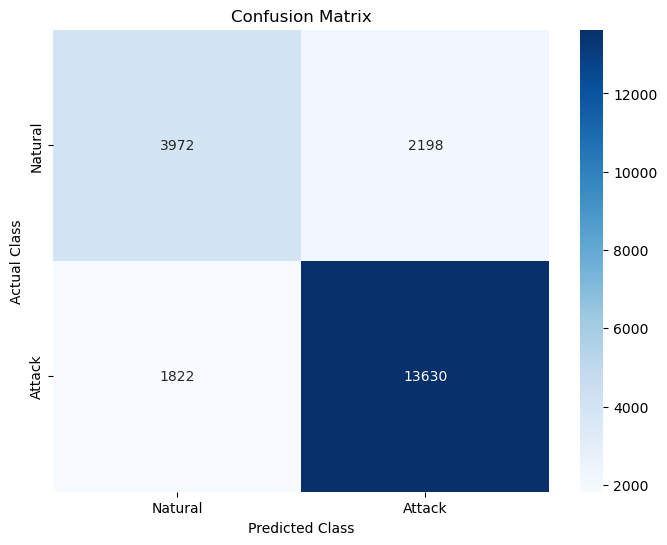

              precision    recall  f1-score   support

           0       0.69      0.64      0.66      6170
           1       0.86      0.88      0.87     15452

    accuracy                           0.81     21622
   macro avg       0.77      0.76      0.77     21622
weighted avg       0.81      0.81      0.81     21622



In [76]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=[0, 1])

# Visualize confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=['Natural', 'Attack'], yticklabels=['Natural', 'Attack'])
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.title('Confusion Matrix')
plt.show()

# Print classification report with precision, recall, and F1-score
print(classification_report(y_test, y_pred))
